In [ ]:
import os
import numpy as np
import random
import shutil
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import seaborn as sb
from os import listdir
from os.path import join
import cv2

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
datadir = Path ("/content/drive/My Drive/Colab Notebooks/content/flowers")
flowers = []
features = []
labels = []
for dir in datadir.iterdir():
    flowers.append(dir.name)
    print(dir.name)
    for img_path in dir.iterdir():
        if img_path.name.endswith("jpg"):
            labels.append(dir.name)
            img_arr = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (150,150))
            features.append(img_arr)

flowers
dandelion
rose
daisy
tulip
sunflower


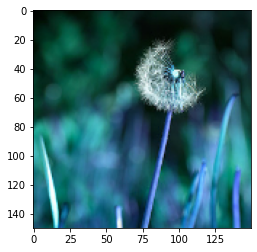

In [8]:
plt.imshow(features[20])
plt.show()

In [9]:
features = np.array(features)
labels = np.array(labels)
np.savez_compressed("flower_data", features, labels)

In [10]:
def prep(features, labels):
    features=features.reshape(len(features), 150,150,3)/255.0
    one_hot=LabelBinarizer()
    labels=one_hot.fit_transform(labels)
    return features, labels, one_hot

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
x,y,one_hot=prep(features, labels)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)

In [20]:
training_model = model.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
21/21 [==============================] - 104s 5s/step - loss: 0.0341 - accuracy: 0.9911
Epoch 2/20
21/21 [==============================] - 105s 5s/step - loss: 0.1157 - accuracy: 0.9641
Epoch 3/20
21/21 [==============================] - 103s 5s/step - loss: 0.0983 - accuracy: 0.9699
Epoch 4/20
21/21 [==============================] - 103s 5s/step - loss: 0.0760 - accuracy: 0.9799
Epoch 5/20
21/21 [==============================] - 103s 5s/step - loss: 0.0593 - accuracy: 0.9776
Epoch 6/20
21/21 [==============================] - 103s 5s/step - loss: 0.0439 - accuracy: 0.9873
Epoch 7/20
21/21 [==============================] - 103s 5s/step - loss: 0.0363 - accuracy: 0.9907
Epoch 8/20
21/21 [==============================] - 104s 5s/step - loss: 0.0241 - accuracy: 0.9931
Epoch 9/20
21/21 [==============================] - 103s 5s/step - loss: 0.0385 - accuracy: 0.9904
Epoch 10/20
21/21 [==============================] - 102s 5s/step - loss: 0.0334 - accuracy: 0.9919
Epoch 11/

In [21]:
model.save("flowermodel.h5")

In [22]:
def plot_accuracy(training_model):
    plt.figure(figsize=(10,5))
    plt.plot(training_model.history["accuracy"], label="Accuracy", color = "b")
    plt.plot(training_model.history["loss"], label = "Loss", color = "r")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

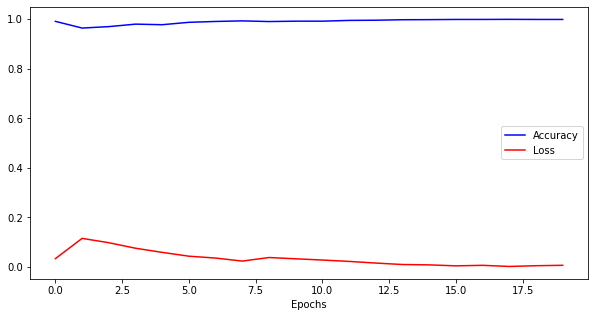

In [23]:
plot_accuracy(training_model)

In [24]:
model=tf.keras.models.load_model("flowermodel.h5")

In [25]:
model.evaluate(x_test,y_test)

55/55 [==============================] - 21s 375ms/step - loss: 2.3608 - accuracy: 0.6584


[2.3608040809631348, 0.6583815217018127]

In [26]:
model.predict(x_test).sum()

1730.0